In [246]:
#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
import numpy as np
import matplotlib.pyplot as plt #for creating plots

import os 
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline 

In [247]:
# download zipcode map
url = 'https://github.com/CUSP2020PUI/Data/raw/master/ZIPCODE.zip'
urllib.request.urlretrieve(url,'Data/ZIPCODE.zip')

('Data/ZIPCODE.zip', <http.client.HTTPMessage at 0x13492e850>)

In [248]:
#it comes in the zip archive, so use zipfile module to extract it
import zipfile
with zipfile.ZipFile('Data/ZIPCODE.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/ZIPCODE')
# load the resulting shapefile using geopandas 
zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [249]:
#load the resulting shapefile using geopandas 
zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


<Axes: >

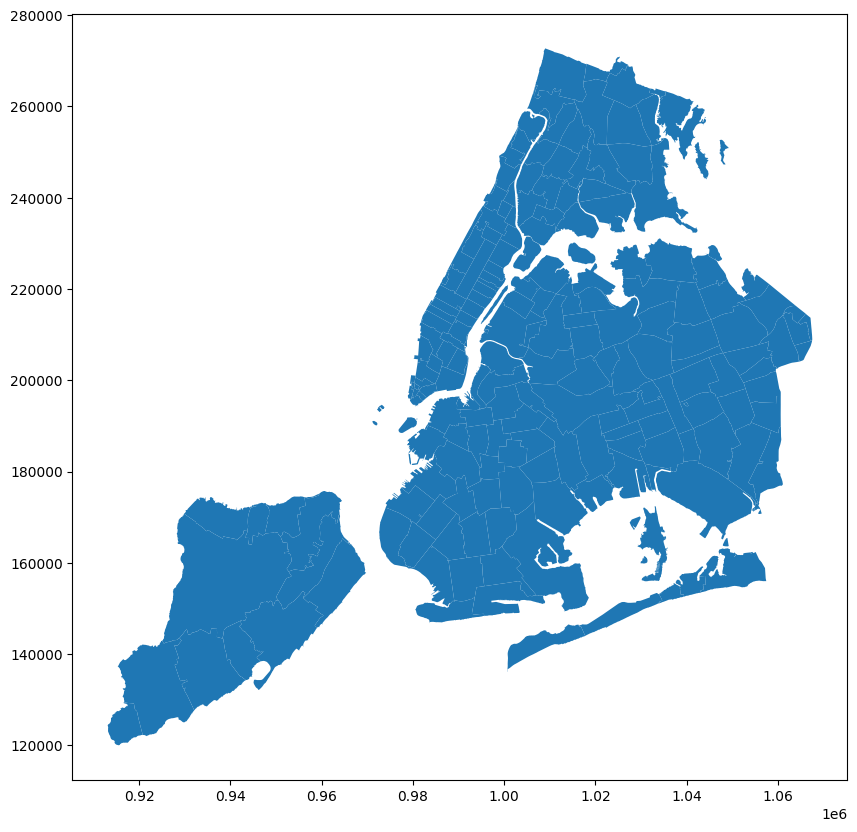

In [250]:
#and if we want to plot the entire shapefile
zipcode.plot(figsize=(10,10),aspect='equal')
#map of zip code areas in NYC

In [251]:
#and this is the list of all unique zip codes within the city
zipcode['ZIPCODE'].unique()

array(['11436', '11213', '11212', '11225', '11218', '11226', '11219',
       '11210', '11230', '11204', '10471', '10470', '10466', '10467',
       '10463', '10475', '10464', '10469', '10468', '10458', '10034',
       '10033', '10462', '10040', '10453', '10465', '10461', '10457',
       '10460', '10032', '10452', '10456', '10472', '10031', '10039',
       '10459', '10451', '10473', '10030', '10027', '10474', '10455',
       '10037', '10024', '10454', '10026', '10035', '10048', '10025',
       '11357', '10029', '00083', '11356', '11359', '11360', '11105',
       '10128', '10023', '11363', '10028', '11354', '11102', '11370',
       '10021', '11358', '11362', '10044', '11369', '11103', '11106',
       '11368', '11377', '11355', '11101', '11364', '10018', '10020',
       '11005', '10017', '10001', '10011', '10016', '11104', '11109',
       '10010', '11367', '10014', '10003', '11222', '10002', '11378',
       '10009', '10012', '10013', '10007', '11237', '11385', '10038',
       '11206', '100

In [252]:
# we see the field is textual; so convert it to numeric (int)
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()
NYC_zipcode

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [253]:
ownership = pd.read_csv('ev_ownership.csv')
station = pd.read_csv('ev_station.csv')


In [254]:
ownership
zero_rows = ownership[ownership['ZIP Code'] == 10314]
zero_rows

,County,ZIP Code,EVs on the Road,EVs On the Road Growth Over 3 Months
189,Richmond County,10314,"1,457",8.90%


In [255]:
station

,Street Address,City,State,ZIP
0,345 Hermes Rd,Malta,NY,12020
1,79 Route 17K,Newburgh,NY,12550
2,55 Oneida St,Oneonta,NY,13820
3,55 Oneida St,Oneonta,NY,13820
4,55 Oneida St,Oneonta,NY,13820
...,...,...,...,...
15676,16889 May Irwin Rd,Clayton,NY,13624
15677,16889 May Irwin Rd,Clayton,NY,13624
15678,380 Boulevard,Kingston,NY,12401
15679,101 Olympic Dr,Lake Placid,NY,12946


In [256]:
ownership = ownership[ownership['ZIP Code'].isin(NYC_zipcode)]
station = station[station['ZIP'].isin(NYC_zipcode)]

In [257]:
ownership['EVs on the Road'] = ownership['EVs on the Road'].str.replace(',', '').astype('int64')
ownership['EVs On the Road Growth Over 3 Months'] = ownership['EVs On the Road Growth Over 3 Months'].str.rstrip('%').astype('float') / 100
ownership

,County,ZIP Code,EVs on the Road,EVs On the Road Growth Over 3 Months
0,Queens County,11377,1400,0.032
1,Queens County,11373,1273,0.080
2,Queens County,11101,1242,0.026
3,Queens County,11105,1046,0.143
4,Queens County,11375,835,0.053
...,...,...,...,...
221,Bronx County,10459,87,0.115
222,Bronx County,10454,64,0.103
223,Bronx County,10464,64,0.067
224,Bronx County,10470,64,0.049


In [258]:
#merge price data with the zip code shapes into a new geopandas dataframe
ownershipGeo = zipcode.merge(ownership,left_on='ZIPCODE',right_on='ZIP Code',how='left')
ownershipGeo

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,County,ZIP Code,EVs on the Road,EVs On the Road Growth Over 3 Months
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1...",Queens County,11436.0,122.0,0.061
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1...",Kings County,11213.0,173.0,0.102
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",Kings County,11212.0,179.0,0.307
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",Kings County,11225.0,213.0,0.139
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",Kings County,11218.0,639.0,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.51 172...",Richmond County,10310.0,238.0,0.067
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.41, 1027813.01 16...",Queens County,11693.0,78.0,0.054
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",Kings County,11249.0,265.0,0.052
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",New York County,10162.0,6.0,0.000


In [259]:
print(ownershipGeo.dtypes)

ZIPCODE                                    int64
BLDGZIP                                   object
PO_NAME                                   object
POPULATION                               float64
AREA                                     float64
STATE                                     object
COUNTY                                    object
ST_FIPS                                   object
CTY_FIPS                                  object
URL                                       object
SHAPE_AREA                               float64
SHAPE_LEN                                float64
geometry                                geometry
County                                    object
ZIP Code                                 float64
EVs on the Road                          float64
EVs On the Road Growth Over 3 Months     float64
dtype: object


Text(0.5, 1.0, 'EVs On the Road Growth Over 3 Months (2024/12) in NYC, CRS: EPSG 2263')

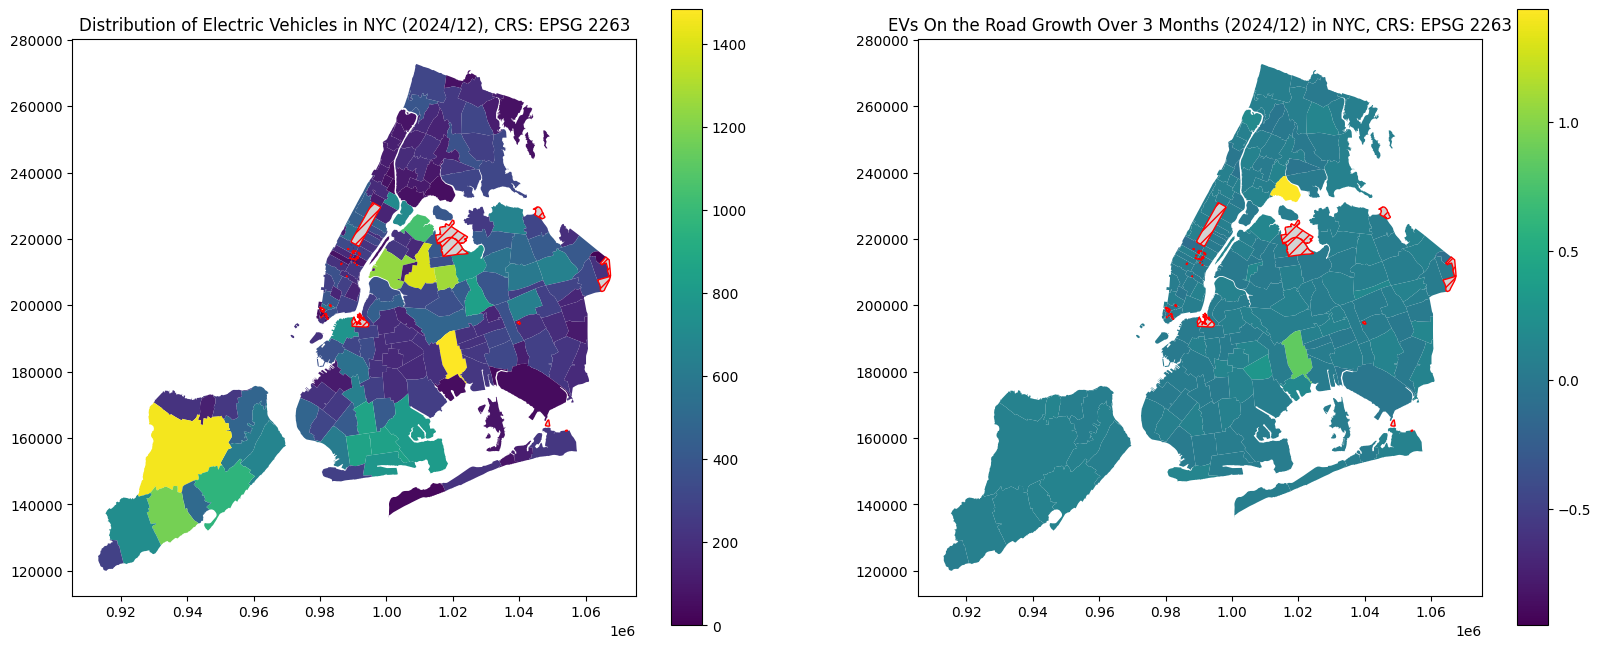

In [260]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
ownershipGeo.to_crs({'init': 'epsg:2263'}).plot(ax=ax[0],column='EVs on the Road',
                                            legend=True,
                                            missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax[0].set_aspect('equal')
ax[0].set_title('Distribution of Electric Vehicles in NYC (2024/12), CRS: EPSG 2263',fontsize=12) 
ownershipGeo.to_crs({'init': 'epsg:2263'}).plot(ax=ax[1],column='EVs On the Road Growth Over 3 Months',
                                            legend=True,
                                            missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax[1].set_title('EVs On the Road Growth Over 3 Months (2024/12) in NYC, CRS: EPSG 2263',fontsize=12) 

In [261]:
station_zip = station[['Street Address','ZIP']].groupby(['ZIP']).count().reset_index().rename(columns={'Street Address': 'EV Charging Ports'})
station_zip

,ZIP,EV Charging Ports
0,10001,47
1,10002,32
2,10003,71
3,10004,29
4,10005,9
...,...,...
133,11432,7
134,11433,8
135,11691,2
136,11692,2


In [262]:
stationGeo = zipcode.merge(station_zip,left_on='ZIPCODE',right_on='ZIP',how='left')
stationGeo

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP,EV Charging Ports
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1...",NaN,NaN
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1...",11213.0,22.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212.0,4.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225.0,10.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.51 172...",10310.0,2.0
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.41, 1027813.01 16...",NaN,NaN
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",11249.0,51.0
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",NaN,NaN


Text(0.5, 1.0, 'Distribution of EV Charging Ports in NYC (2024/12), CRS: EPSG 2263')

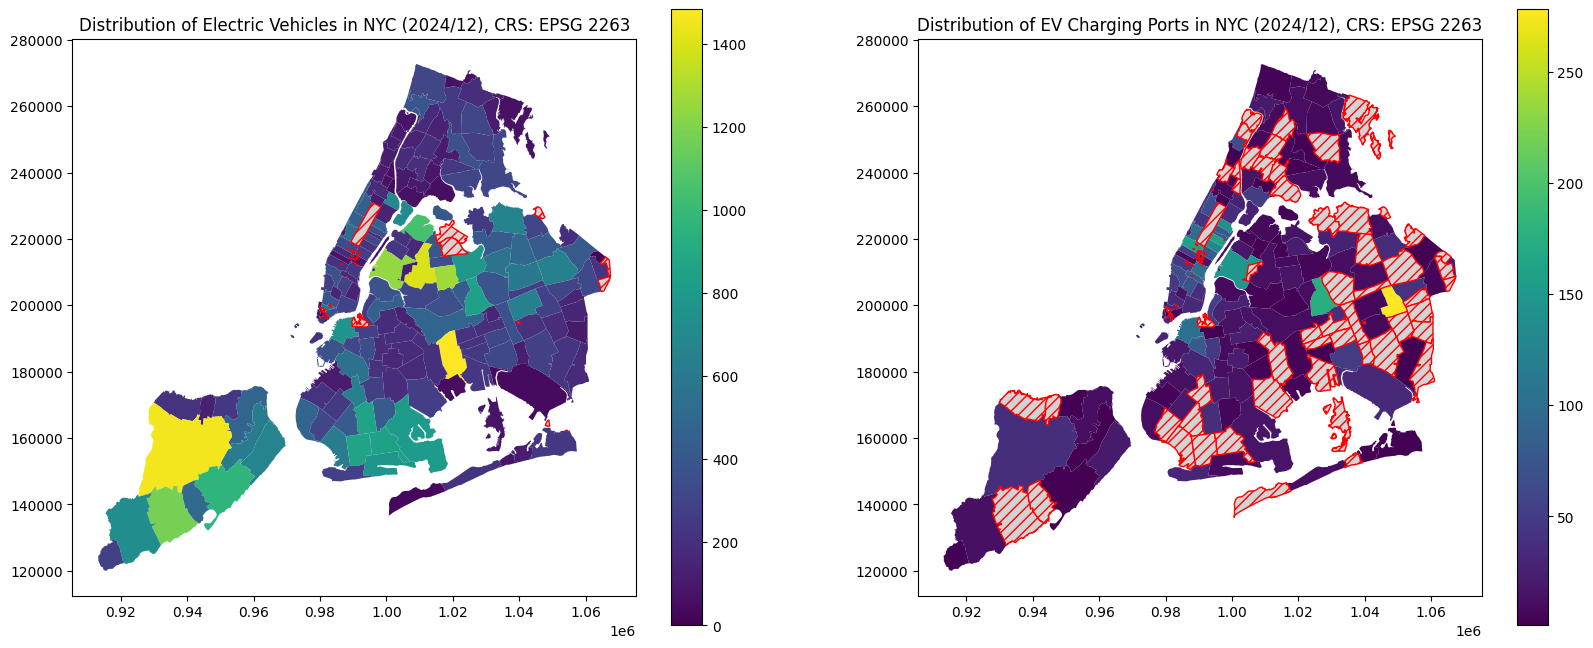

In [263]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
ownershipGeo.to_crs({'init': 'epsg:2263'}).plot(ax=ax[0],column='EVs on the Road',
                                            legend=True,
                                            missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax[0].set_aspect('equal')
ax[0].set_title('Distribution of Electric Vehicles in NYC (2024/12), CRS: EPSG 2263',fontsize=12) 
stationGeo.to_crs({'init': 'epsg:2263'}).plot(ax=ax[1],column='EV Charging Ports',
                                            legend=True,
                                            missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax[1].set_title('Distribution of EV Charging Ports in NYC (2024/12), CRS: EPSG 2263',fontsize=12) 